In [43]:
#packages 
from wsgiref.simple_server import WSGIRequestHandler
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from sklearn import preprocessing
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
import matplotlib.pylab as plt
from dmba import classificationSummary, gainsChart
from IPython.display import display_html

no display found. Using non-interactive Agg backend


In [2]:
#EDA
#importing the data 
df = pd.read_csv ('/Users/georgegarcia/Desktop/505 fall22/final/Global_Superstore2.csv')


In [4]:
df.shape

(51290, 24)

In [8]:
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [17]:
df.isnull().sum() / df.shape[0] * 100

Row ID             0.00000
Order ID           0.00000
Order Date         0.00000
Ship Date          0.00000
Ship Mode          0.00000
Customer ID        0.00000
Customer Name      0.00000
Segment            0.00000
City               0.00000
State              0.00000
Country            0.00000
Postal Code       80.51472
Market             0.00000
Region             0.00000
Product ID         0.00000
Category           0.00000
Sub-Category       0.00000
Product Name       0.00000
Sales              0.00000
Quantity           0.00000
Discount           0.00000
Profit             0.00000
Shipping Cost      0.00000
Order Priority     0.00000
dtype: float64

Missing postal codes?
i think we should drop postal code becasue there is no added information that city can't give us 

In [10]:
#viewing the first 10 rows 
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
5,22732,IN-2013-42360,28-06-2013,01-07-2013,Second Class,JM-15655,Jim Mitchum,Corporate,Sydney,New South Wales,...,TEC-PH-10000030,Technology,Phones,"Samsung Smart Phone, with Caller ID",2862.675,5,0.1,763.2750,897.35,Critical
6,30570,IN-2011-81826,07-11-2011,09-11-2011,First Class,TS-21340,Toby Swindell,Consumer,Porirua,Wellington,...,FUR-CH-10004050,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable",1822.080,4,0.0,564.8400,894.77,Critical
7,31192,IN-2012-86369,14-04-2012,18-04-2012,Standard Class,MB-18085,Mick Brown,Consumer,Hamilton,Waikato,...,FUR-TA-10002958,Furniture,Tables,"Chromcraft Conference Table, Fully Assembled",5244.840,6,0.0,996.4800,878.38,High
8,40155,CA-2014-135909,14-10-2014,21-10-2014,Standard Class,JW-15220,Jane Waco,Corporate,Sacramento,California,...,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,5083.960,5,0.2,1906.4850,867.69,Low
9,40936,CA-2012-116638,28-01-2012,31-01-2012,Second Class,JH-15985,Joseph Holt,Consumer,Concord,North Carolina,...,FUR-TA-10000198,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124,865.74,Critical


In [25]:
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print(" number of duplicate rows:", duplicate_rows_df)

 number of duplicate rows: Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, City, State, Country, Postal Code, Market, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit, Shipping Cost, Order Priority]
Index: []

[0 rows x 24 columns]


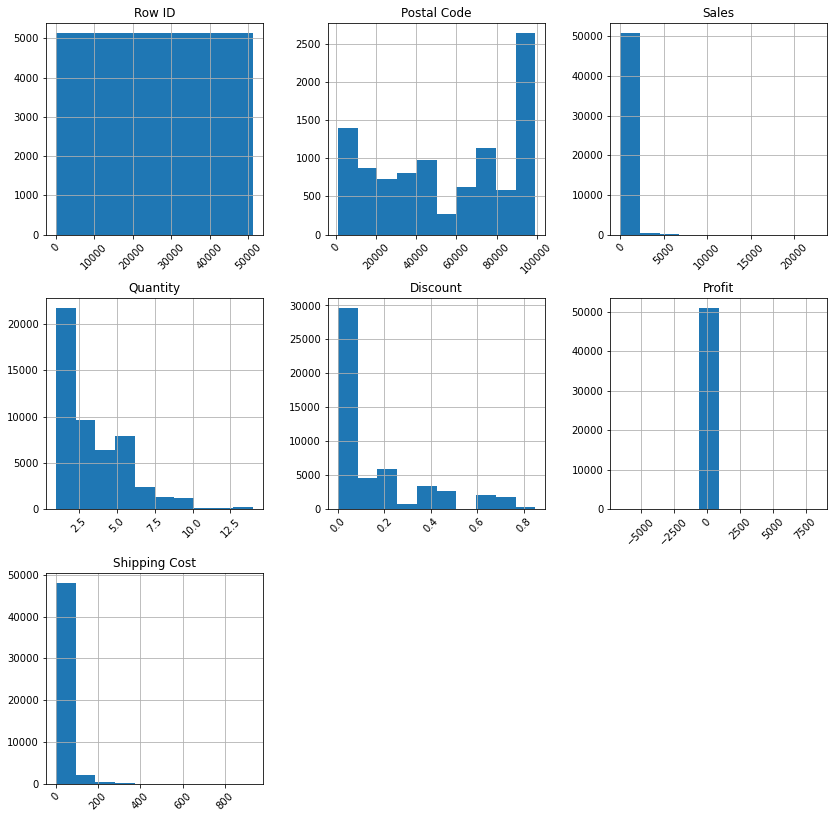

In [15]:
df.hist(figsize=(14,14), xrot=45)
plt.show()

the data is skwed/ out liers
quantity might be normalized by logarithm [log10(x)]
discount/shipping cost be normalized by inverse [1/x]

# Not Normalized the data 

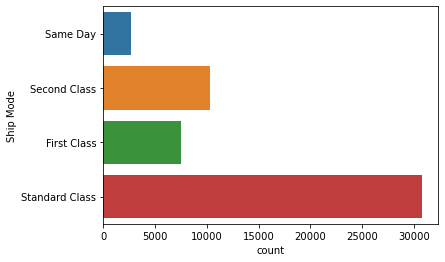

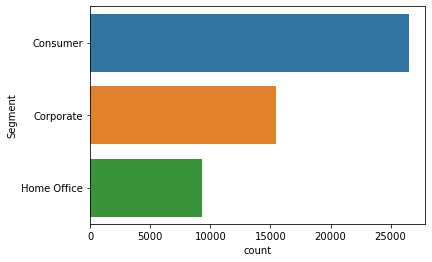

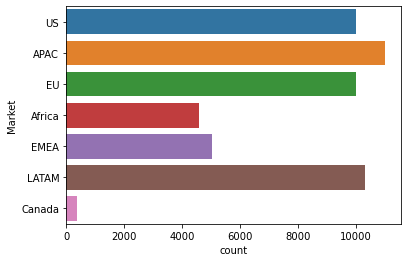

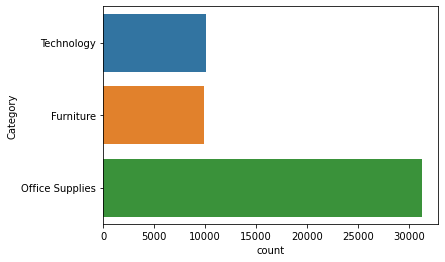

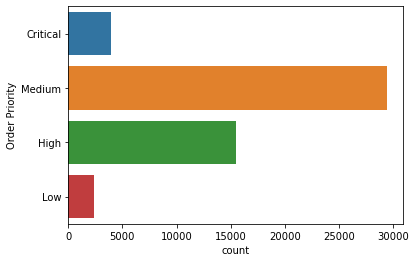

In [34]:
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 10:
        sns.countplot(y=column, data=df)
        plt.show()

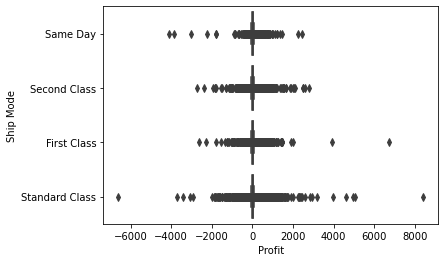

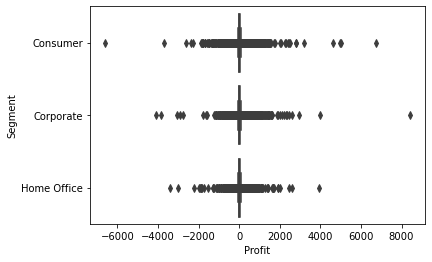

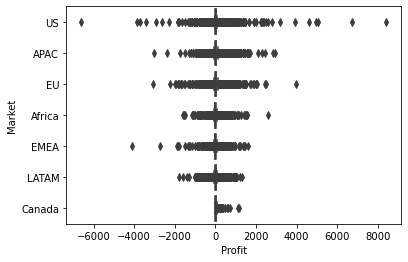

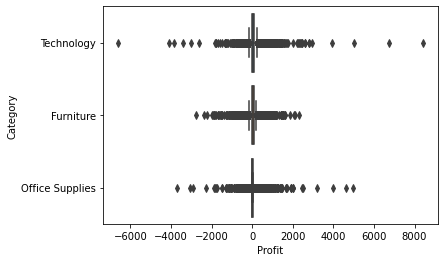

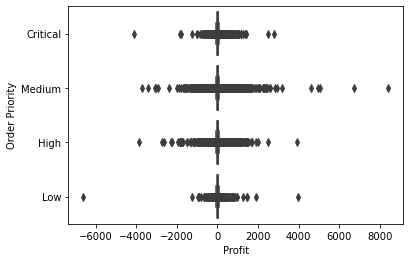

In [41]:
for column in df.select_dtypes(include='object'):
 if df[column].nunique() < 10:
    sns.boxplot(y=column, x='Profit', data=df) 
    plt.show()

In [42]:
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 10:
        display(df.groupby(column).mean())

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
Ship Mode,,,,,,,
First Class,25795.386276,54765.611834,243.967507,3.469554,0.148898,27.728804,41.053065
Same Day,26447.277305,57536.082873,247.020357,3.417253,0.143525,28.201802,42.937453
Second Class,25693.750994,55626.009254,248.876873,3.465322,0.140620,28.381368,30.469747
Standard Class,25522.415792,54944.447051,246.260020,3.487214,0.142159,28.938945,19.971755


,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
Segment,,,,,,,
Consumer,25615.618297,55649.895781,245.416299,3.475262,0.143602,28.254008,26.295371
Corporate,25606.789228,54482.228477,247.890176,3.471709,0.142931,28.596042,26.604087
Home Office,25794.239324,55051.998317,247.228403,3.488173,0.140897,29.648847,26.227720


,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
Market,,,,,,,
APAC,25795.500000,NaN,325.917481,3.747137,0.148839,39.629163,35.190430
Africa,46223.183344,NaN,170.868370,2.303030,0.156704,19.374674,19.215058
Canada,46487.111979,NaN,174.292109,2.169271,0.000000,46.399453,19.285495
EMEA,46336.887453,NaN,160.302508,2.290117,0.196083,8.728966,17.573221
EU,15294.500000,NaN,293.808906,3.777300,0.103105,37.282974,30.942235
LATAM,5147.500000,NaN,210.278334,3.742568,0.135531,21.531328,22.745153
US,36293.500000,55190.379428,229.858001,3.789574,0.156203,28.656896,23.831678


,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
Category,,,,,,,
Furniture,24451.996760,55726.556341,416.248905,3.539287,0.168087,28.878567,44.584919
Office Supplies,26073.185304,54890.951211,121.097120,3.459278,0.137409,16.578961,12.964899
Technology,25488.911449,55551.572279,467.858939,3.468691,0.135342,65.454958,49.999876


,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
Order Priority,,,,,,,
Critical,26046.747457,54771.961686,250.822854,3.417854,0.136516,31.593124,59.721333
High,25751.321141,55597.518410,245.632420,3.485001,0.143341,27.119122,32.871887
Low,24655.840347,58667.250000,234.251621,3.422855,0.142200,24.197958,27.076448
Medium,25617.670574,54765.879159,247.371738,3.484354,0.143592,29.361729,18.442428


In [16]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [20]:
corrMatrix = df.corr()

<AxesSubplot:>

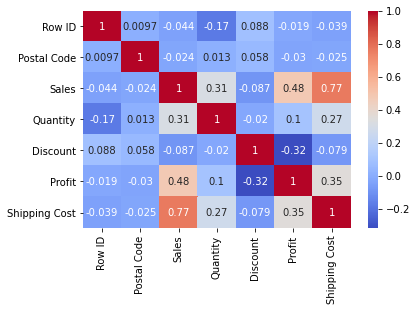

In [21]:
sns.heatmap(corrMatrix, annot = True, cmap= 'coolwarm')

# George data maliputaiton to predict which customers for better sales


#droping not need column

In [44]:
#making a copy of the data 
df1 = df.copy()

In [45]:
#droping postical to many NA and no added information is gained an no correlation with any other features
df1 = df1.drop(columns = ['Postal Code'])

In [46]:
#order data, shipping data dont add inforamation beside when they bought the iteam?
#orderID and RowID don't hould any further information that the customer name dosent give?
df1 = df1.drop(df1.columns[[0, 1, 2, 3]],axis = 1)

In [47]:
df1.head(3)

,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium


In [136]:
#filter the data fram for only point to point (profit >0 )
pf = df1[df1['Profit'] > 50]

In [137]:
pf.tail()

,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
50771,Second Class,SJ-20215,Sarah Jordon,Consumer,Mexico City,Distrito Federal,Mexico,LATAM,North,OFF-SU-10001722,Office Supplies,Supplies,"Stiletto Box Cutter, Easy Grip",175.42,7,0.0,80.6400,0.20,High
50778,Same Day,CR-12820,Cyra Reiten,Home Office,Vienna,Vienna,Austria,EU,Central,OFF-ST-10000624,Office Supplies,Storage,"Eldon File Cart, Single Width",128.37,1,0.0,55.1700,0.20,Medium
50789,Standard Class,AJ-10795,Anthony Johnson,Corporate,San Francisco,California,United States,US,West,OFF-LA-10001474,Office Supplies,Labels,Avery 477,274.77,9,0.0,126.3942,0.20,High
50974,Standard Class,KW-6570,Kelly Williams,Consumer,Cairo,Al Qahirah,Egypt,Africa,Africa,FUR-SAF-10002314,Furniture,Chairs,"SAFCO Swivel Stool, Black",331.02,2,0.0,119.1600,0.16,Medium
51178,Standard Class,JM-5250,Janet Martin,Consumer,Bur Sudan,Red Sea,Sudan,Africa,Africa,TEC-MOT-10001088,Technology,Phones,"Motorola Audio Dock, VoIP",173.46,1,0.0,50.2800,0.09,Medium


In [66]:
df1.columns

Index(['Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'City', 'State',
       'Country', 'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

In [80]:
f = ['Ship Mode', 'Segment', 'Market', 'Category', 'Sales']

In [148]:
y = pf["Profit"]
yq = pf["Quantity"]

In [149]:
x = pf[f]
x.head()

,Ship Mode,Segment,Market,Category,Sales
0,Same Day,Consumer,US,Technology,2309.650
2,First Class,Consumer,APAC,Technology,5175.171
4,Same Day,Consumer,Africa,Technology,2832.960
5,Second Class,Corporate,APAC,Technology,2862.675
6,First Class,Consumer,APAC,Furniture,1822.080


In [150]:
x.shape

(10365, 5)

In [191]:
#transformation of cat data and allowing the interger to pass through 
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder (sparse = False)
from sklearn.compose import make_column_transformer
column_trans = make_column_transformer(
    (OneHotEncoder(), ['Ship Mode', 'Segment', 'Market', 'Category']),
    remainder = 'passthrough')

In [192]:
xt = column_trans.fit_transform(x)

In [194]:
xt.shape

(10365, 18)

# XGboost 

In [198]:
#packages that are needed 
from scipy.stats import uniform, randint
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV

In [200]:
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [197]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [201]:
#splitting up te data 
X_train, X_test, y_train, y_test = train_test_split(xt, y, test_size=0.7, random_state=1)

In [202]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse=mean_squared_error(y_test, y_pred)

print(np.sqrt(mse))

[00:11:02] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
167.56542883381238


# hypertuning the XGBoost

In [207]:
xgb_model = xgb.XGBRegressor()

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=5,
                            verbose=1, n_jobs=1, return_train_score=True)

search.fit(X_train, y_train)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Model with rank: 1
Mean validation score: 0.717 (std: 0.102)
Parameters: {'colsample_bytree': 0.7386639165731947, 'gamma': 0.06402291947888622, 'learning_rate': 0.0755708080536883, 'max_depth': 3, 'n_estimators': 115, 'subsample': 0.8563498979212858}



In [211]:
#fitting the best model
xgb_model = xgb.XGBRegressor()

params = {
    'colsample_bytree': 0.7386639165731947,
    'gamma': 0.06402291947888622,
    'learning_rate': 0.0755708080536883,
    'max_depth': 3,
    'n_estimators': 115,
    'subsample': 0.8563498979212858
}
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

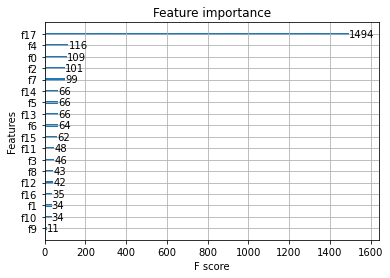

In [215]:
xgb.plot_importance(xgb_model)

# which product to suggest stocking

In [153]:
#packages needed to make suggestion 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import Perceptron

In [154]:
x2 = pf['Product Name']

In [155]:
vectorizer = TfidfVectorizer()
spmat = vectorizer.fit_transform(x2)

In [174]:
feat_names = vectorizer.get_feature_names()
X3 = pd.DataFrame.sparse.from_spmatrix(spmat, columns=feat_names)
Xtrain, Xtest, ytrain, ytest = train_test_split(X3, yq, test_size=0.5, random_state=1)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [175]:
kbest = SelectKBest(chi2, k= 10)
X_new = kbest.fit_transform(Xtrain, ytrain)
print('Top 10 features %s' % Xtrain.columns[kbest.get_support()].tolist())

Top 10 features ['06', '1883', '485', 'connectors', 'f9h710', 'flexible', 'ruler', 'southworth', 'supervisor', 'trimflex']
